In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from preprocess import Audio_Processor
import classifiers
import feature_reduce
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Setup

In [3]:
path_to_db='../ESC-50/'
preprocess = Audio_Processor(path_to_db + 'audio/')
fld = 1

# Load Dataset

In [4]:
dataset = pd.read_csv(path_to_db + 'meta/esc50.csv')

In [5]:
dataset.head()

filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A

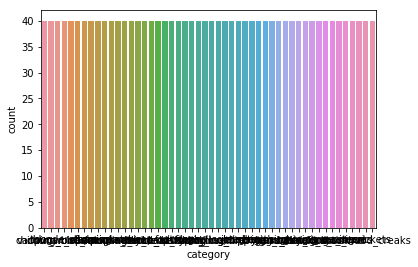

In [6]:
sns.countplot(dataset['category'])

## Preprocessing
Just MFCC were sufficient in previous work.
13 coefficients together with first and second derivatives and remove first energy component.
Should yield vector of 38 features per time frame.

In [7]:
test_file = preprocess.preprocess('1-100032-A-0.wav')

## Getting Preprocessed Data
We allow for previously preprocessed data to be retrieved for faster training turnaround. If the fold has been preprocessed, it is loaded but if not it is processed and saved.

In [8]:
import pickle
def save_obj(obj, name ):
    with open('../preprocessed_objs/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('../preprocessed_objs/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def process_fold(fld):
    try:
        df = load_obj("fold_" + str(fld))
    except IOError:
        start_time = time.time()
        df = preprocess.preprocess_fold(fld, dataset, parallel=False)
        print("\tBytes: " + str(df.memory_usage(index=True).sum()))
        print("\tProcessing Time: " + str(time.time() - start_time))
        save_obj(df, "fold_" + str(fld))
    return df

In [10]:
c_data = process_fold(fld)

In [11]:
c_data.head()

0           1          2          3          4          5  \
0    0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   
1   83.621621  -50.483010 -31.115186  -3.566867 -19.398316 -14.354486   
2  109.848331 -110.083820 -54.568920 -30.153585 -58.985460  -5.598281   
3   77.698670 -123.925469 -64.058169 -27.170063 -57.606930  -9.980594   
4   58.790968 -133.719666 -76.282456 -25.140746 -54.371150 -13.053846   

           6          7          8          9    ...           29        30  \
0   0.000000   0.000000   0.000000   0.000000    ...     2.323366  5.238711   
1  -4.658161 -14.146847 -16.949019  -1.723476    ...     2.323366  5.238711   
2  -5.862913  17.490401  12.544187  13.053928    ...     2.323366  5.238711   
3   6.718248  21.293678  15.173490  -1.113725    ...     2.323366  5.238711   
4  14.737484  17.361937  12.619366  -8.285872    ...     2.323366  5.238711   

         31        32        33        34        35        36        37  \
0  0.887285 -0.479714 -2.101468 -2.279721 -0.546664  0.781288  2.636188   
1  0.887285 -0.479714 -2.101468 -2.279721 -0.546664  0.781288  2.636188   
2  0.887285 -0.479714 -2.101468 -2.279721 -0.546664  0.781288  2.636188   
3  0.887285 -0.479714 -2.101468 -2.279721 -0.546664  0.781288  2.636188   
4  0.887285 -0.479714 -2.101468 -2.279721 -0.546664  0.781288  2.636188   

   category  
0       dog  
1       dog  
2       dog  
3       dog  
4       dog  

[5 rows x 39 columns]

In [17]:
n_categories = c_data.category.unique().size

## Overall DNN
Train DNNs for all categories over frames in preprocessed data

In [ ]:
dnn = classifier.gpu_train('dnn', n_categories, c_data.drop(, c_data.category)

## Scoring
Here we get the log likelihood of the categories when matched with its training data

In [ ]:
# a is the audio document A (a matrix of preprocessed audio frames)
# gmm is a category trained gmm
# b_gmm is the background trained gmm
def score(A, gmm, b_gmm, nbytes):
    normalization = 1 / A.shape[0]
    n = gmm.score(A)
    numerator = np.exp(gmm.score(A))
    print(numerator.asarray())
    denominator = cm.exp(b_gmm.score(A))
    print(denominator.asarray())
    T = numerator.divide(denominator)
    B = cm.log(T)
    B.mult(normalization)
    return B.asarray()

In [ ]:
score(test_file, categorical_gmms['dog'], b_gmm, category_processed['dog'].nbytes)

In [ ]:
test_file.shape[1]